# Estimating Stock Investment Returns using Capital Asset Pricing Model (CAPM)

## Objective

Capital Asset Pricing Model (CAPM) is one of the most popular financial models used by analysts in order to derive expected return of a stock. 
Using Pandas, Pandas-datareader, yfinance, and getFamaFrenchFactors packages, this project focus on deriving the monthly and annually expected stock return of Microsoft Corp (NASDAQ:MSFT) using Capital Asset Pricing Model (CAPM).

Note: This project is for informational purposes only


## CAPM Forumla

The CAPM forumla is given by:$$r_i = r_f + \beta (r_m - r_f) + \epsilon$$
where:
- $r_i$ represents expected represents return on investment
- $r_f$ represents risk free return
- $\beta$ represents Beta, a measure of systematic risk of a security compared to market as a whole
- $\epsilon$ represents error term. For this analysis, it is assumed error term is equal to 0

## Inputs

Importing Pandas Package as pd in order to perform data calculation

In [3]:
import pandas as pd

Importing Financial packages pandas-datareader and yfinance

In [4]:
import pandas_datareader as web
import yfinance as yf

Importing statsmodel package in order to be able to perform regression analysis

In [5]:
import statsmodels.api as sm

Importing Fama French package in order to extract historical Fama French Factors

In [6]:
import getFamaFrenchFactors as gff

## Inputs

Selecting symbol of stocks in order to extract historical data.

In [7]:
symbol = ['MSFT']

Selecting dates for which historical data will be imported

In [8]:
start_date = '2017-01-01'
end_date = '2022-12-31'

## Gathering Stock Data and Visualizing Adjusted Closing Prices

Extracting Historical data between the dates selected for the stock

In [9]:
stock_data = yf.download(symbol, start_date, end_date)
print(stock_data["Adj Close"])

[*********************100%***********************]  1 of 1 completed
Date
2017-01-03     57.501343
2017-01-04     57.244076
2017-01-05     57.244076
2017-01-06     57.740250
2017-01-09     57.556473
                 ...    
2022-12-23    238.133545
2022-12-27    236.367981
2022-12-28    233.944031
2022-12-29    240.407837
2022-12-30    239.220825
Name: Adj Close, Length: 1510, dtype: float64


Calculating monthly stock data over the dates selected

             Adj Close
Date                  
2017-01-31   59.403358
2017-02-28   59.144131
2017-03-31   60.882034
2017-04-30   63.285522
2017-05-31   64.931267
...                ...
2022-08-31  260.083771
2022-09-30  231.665237
2022-10-31  230.899323
2022-11-30  254.502548
2022-12-31  239.220825

[72 rows x 1 columns]
Axes(0.125,0.11;0.775x0.77)


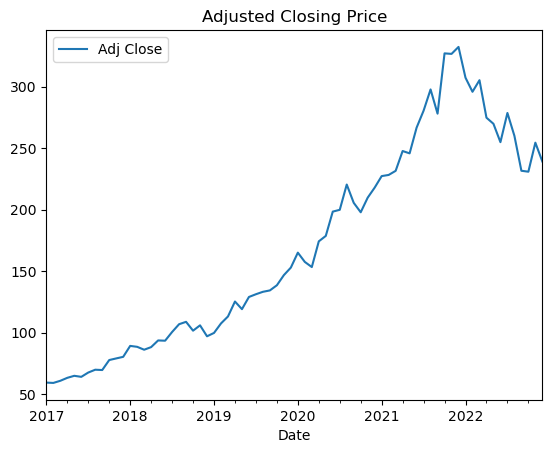

In [10]:
stock_data_monthly = stock_data.resample('1M').last()
stock_Adj_Close_data = pd.DataFrame()
stock_Adj_Close_data["Adj Close"] = stock_data_monthly["Adj Close"]
print(stock_Adj_Close_data)
print(stock_Adj_Close_data.plot(title = "Adjusted Closing Price"))

<center> From the above graph, we can visualize that stock price of Mircosoft Corp has risen consistently until last quarter of 2021, 
    after which the stock had bearish run</center>

## Calculating and Analyzing Monthly Stock Returns

            Adj Close
Date                 
2017-02-28  -0.004364
2017-03-31   0.029384
2017-04-30   0.039478
2017-05-31   0.026005
2017-06-30  -0.013030
...               ...
2022-08-31  -0.066663
2022-09-30  -0.109267
2022-10-31  -0.003306
2022-11-30   0.102223
2022-12-31  -0.060045

[71 rows x 1 columns]
Axes(0.125,0.11;0.775x0.77)


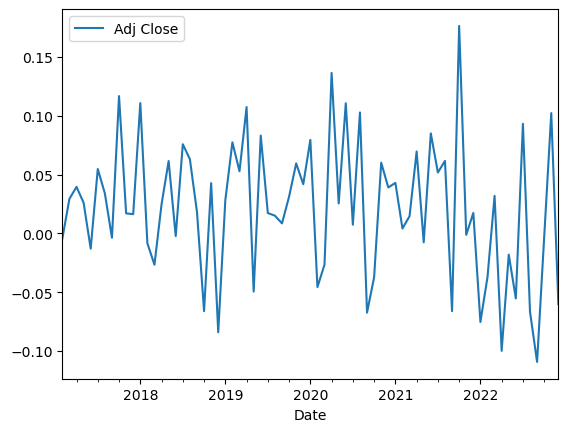

In [11]:
stock_returns = stock_Adj_Close_data.pct_change()
stock_returns = stock_returns.dropna()

print(stock_returns)
print(stock_returns.plot.line())

<center> from the above graph, we can visualize that monthly stock returns of Mircosoft Corp had been volatile, ranging from -10% to +15%, approximately</center>

## Extracting Risk-free returns and Market Excess Returns

Extracting fama french factors in order to get risk-free returns and market excess returns

In [12]:
fama_french_factors = pd.DataFrame(gff.famaFrench3Factor())
fama_french_factors

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...,...
1156,2022-11-30,0.0460,-0.0340,0.0138,0.0029
1157,2022-12-31,-0.0641,-0.0068,0.0132,0.0033
1158,2023-01-31,0.0665,0.0502,-0.0405,0.0035
1159,2023-02-28,-0.0258,0.0121,-0.0078,0.0034


In [13]:
Excess_return = pd.DataFrame()
Excess_return["Date"] = fama_french_factors["date_ff_factors"]
Excess_return["Mkt-RF"] = fama_french_factors["Mkt-RF"]

Excess_return.set_index("Date", inplace = True)
Excess_return

,Mkt-RF
Date,
1926-07-31,0.0296
1926-08-31,0.0264
1926-09-30,0.0036
1926-10-31,-0.0324
1926-11-30,0.0253
...,...
2022-11-30,0.0460
2022-12-31,-0.0641
2023-01-31,0.0665


Creating a new DataFrame with Excess Market Return and Adjusted Closing Data

In [17]:
data = Excess_return.merge(stock_returns, on = 'Date')
data

,Mkt-RF,Adj Close
Date,,
2017-02-28,0.0357,-0.004364
2017-03-31,0.0017,0.029384
2017-04-30,0.0109,0.039478
2017-05-31,0.0106,0.026005
2017-06-30,0.0078,-0.013030
...,...,...
2022-08-31,-0.0377,-0.066663
2022-09-30,-0.0935,-0.109267
2022-10-31,0.0783,-0.003306


## Extracting CAPM Factors

We have to run regression analysis in order to calculate $\beta$. 

Selecting market excess return as x and Adjusted closing price of stock as Y in regression analysis.

In [18]:
X = data["Mkt-RF"]
Y = data["Adj Close"]

model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Adj Close   R-squared (uncentered):                   0.606
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              107.5
Date:                Sat, 06 May 2023   Prob (F-statistic):                    8.77e-16
Time:                        19:35:02   Log-Likelihood:                          128.94
No. Observations:                  71   AIC:                                     -255.9
Df Residuals:                      70   BIC:                                     -253.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.9361      0.090     10.366      0.000       0.756       1.116
==============================================================================
Omnibus:                        2.197   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.560
Skew:                           0.342   Prob(JB):                        0.458
Kurtosis:                       3.245   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Extracting $\beta$ from regression analysis

In [27]:
beta = result.params['Mkt-RF']
beta
print(f'Beta of stock is {beta:.02}')

Beta of stock is 0.94


Extracting $(r_m - r_f)$ and $r_f$

In [20]:
market_excess_return = data["Mkt-RF"].mean()
risk_free_return = fama_french_factors["RF"].mean()

## Results

Calculating expected monthly return on investment

In [30]:
Expected_Monthly_return_on_investment = risk_free_return + beta * market_excess_return
print(f'The expected monthly return on investment is {Expected_Monthly_return_on_investment:.2%}.')

The expected monthly return on investment is 1.09%.


Calculating approximate annual return on investment

In [29]:
Approx_Annual_return_on_investment = Expected_Monthly_return_on_investment * 12
print(f'The approximate annual return on investment is {Approx_Annual_return_on_investment:.2%}.')

The approximate annual return on investment is 13.12%.
